### Tratamento de valores nulos

##### Importando as bibliotecas que serão utilizadas no projeto

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

##### Preparando os dados para uso

In [2]:
# Configurar o gerador de números aleatórios para reprodutibilidade
random.seed(0)
np.random.seed(0)

In [3]:
# Listas de nomes e cidades fictícias
nomes = ["Ana", "Bruno", "Carlos", "Diana", "Eduardo", "Fernanda", "Gustavo", "Helena", "Igor", "Juliana"]
cidades = ["Teresina", "Rio de Janeiro", "Belo Horizonte", "Curitiba", "Porto Alegre", "Recife", "Salvador", "Brasília", "Fortaleza", "Manaus"]

In [4]:
# Gerando dados (1000 linhas)
data = {
    "Nome": [random.choice(nomes) for _ in range(1000)],
    "Idade": [random.choice([np.nan, random.randint(18, 70)]) for _ in range(1000)],
    "Cidade": [random.choice(cidades) for _ in range(1000)],
    "Salário": [round(random.uniform(1500, 10000), 2) for _ in range(1000)]
}

In [5]:
# Criando um DataFrame com os dados aleatórios gerados
df = pd.DataFrame(data)

In [6]:
# Exibindo uma amostra dos dados
df.head()

,Nome,Idade,Cidade,Salário
0,Gustavo,29.0,Manaus,6568.87
1,Gustavo,NaN,Curitiba,3395.24
2,Ana,NaN,Fortaleza,1562.50
3,Eduardo,65.0,Manaus,5290.35
4,Igor,NaN,Fortaleza,1591.56


In [7]:
# Salvando o DataFrame em um arquivo CSV
df.to_csv("datasets/dataset_with_null_ages.csv", index=False)

##### Indexação, Filtros, loc e iloc

In [8]:
# Selecionando a coluna idade
coluna_idade = df['Idade']
coluna_idade.head()

0    29.0
1     NaN
2     NaN
3    65.0
4     NaN
Name: Idade, dtype: float64

Filtro

In [9]:
# Selecionando linhas com base em condição
maiores_de_30 = df[df['Idade'] > 30]
maiores_de_30

,Nome,Idade,Cidade,Salário
3,Eduardo,65.0,Manaus,5290.35
5,Helena,42.0,Manaus,2804.46
7,Eduardo,32.0,Manaus,6420.72
10,Juliana,61.0,Brasília,8195.99
11,Diana,32.0,Manaus,7878.37
...,...,...,...,...
984,Juliana,51.0,Recife,2434.32
985,Igor,31.0,Porto Alegre,3492.52
986,Diana,31.0,Curitiba,9183.88
988,Helena,52.0,Teresina,6309.56


loc

In [10]:
# Seleção por rótulo (nome da linha/coluna)
primeira_linha = df.loc[0]  # Primeira linha
primeira_linha

Nome       Gustavo
Idade         29.0
Cidade      Manaus
Salário    6568.87
Name: 0, dtype: object

In [11]:
# Valor da coluna 'Nome' na 3ª linha
valor_especifico = df.loc[2, 'Nome']  
valor_especifico

'Ana'

iloc

In [12]:
# Seleção por posição (índice numérico)
primeiras_3_linhas = df.iloc[:3]  # 3 primeiras linhas
primeiras_3_linhas

,Nome,Idade,Cidade,Salário
0,Gustavo,29.0,Manaus,6568.87
1,Gustavo,NaN,Curitiba,3395.24
2,Ana,NaN,Fortaleza,1562.50


In [13]:
# Colunas 2 e 3 (índice 1 e 2)
coluna_2_e_3 = df.iloc[:, 1:3]  
coluna_2_e_3

,Idade,Cidade
0,29.0,Manaus
1,NaN,Curitiba
2,NaN,Fortaleza
3,65.0,Manaus
4,NaN,Fortaleza
...,...,...
995,NaN,Recife
996,NaN,Salvador
997,31.0,Curitiba
998,NaN,Salvador


##### Métodos info() e describe()

In [14]:
# info(): Informações sobre o DataFrame (tipos de dados, valores não nulos, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Nome     1000 non-null   object 
 1   Idade    496 non-null    float64
 2   Cidade   1000 non-null   object 
 3   Salário  1000 non-null   float64
dtypes: float64(2), object(2)
memory usage: 31.4+ KB


In [15]:
# describe(): Estatísticas descritivas das colunas numéricas
df.describe()

,Idade,Salário
count,496.000000,1000.000000
mean,44.018145,5699.578980
std,15.262738,2486.157528
min,18.000000,1506.980000
25%,31.000000,3556.767500
50%,44.000000,5629.440000
75%,57.000000,7923.920000
max,70.000000,9977.560000


##### Métodos isnull() e fillna()

In [16]:
# isnull(): Identificando valores nulos (retorna True para nulos)
valores_nulos = df.isnull()
valores_nulos

,Nome,Idade,Cidade,Salário
0,False,False,False,False
1,False,True,False,False
2,False,True,False,False
3,False,False,False,False
4,False,True,False,False
...,...,...,...,...
995,False,True,False,False
996,False,True,False,False
997,False,False,False,False
998,False,True,False,False


In [17]:
# Se usarmos o método .sum(), considerando que há uma "conversão" de True para o inteiro 1 e False para 0, teremos a quantidade total de nulos por coluna
valores_nulos.sum()

Nome         0
Idade      504
Cidade       0
Salário      0
dtype: int64

In [18]:
# Verificando o valor da média e da mediana da coluna Idade antes do tratamento
print(df['Idade'].mean())
print(df['Idade'].median())

44.01814516129032
44.0


In [19]:
# fillna(): Preenchendo valores nulos
df_idades_nulas_com_media = df.fillna(df['Idade'].median())  # Preenche com a mediana da coluna Idade
df_idades_nulas_com_media

,Nome,Idade,Cidade,Salário
0,Gustavo,29.0,Manaus,6568.87
1,Gustavo,44.0,Curitiba,3395.24
2,Ana,44.0,Fortaleza,1562.50
3,Eduardo,65.0,Manaus,5290.35
4,Igor,44.0,Fortaleza,1591.56
...,...,...,...,...
995,Diana,44.0,Recife,4176.71
996,Ana,44.0,Salvador,4562.78
997,Bruno,31.0,Curitiba,1797.11
998,Juliana,44.0,Salvador,9383.31


In [20]:
# Ao rodar a quantidade de nulos por coluna, vamos ver se tudo foi preenchido
df_idades_nulas_com_media.isnull().sum()

Nome       0
Idade      0
Cidade     0
Salário    0
dtype: int64

##### Visualizando as Idades e os Salários

<Axes: xlabel='Salário', ylabel='Count'>

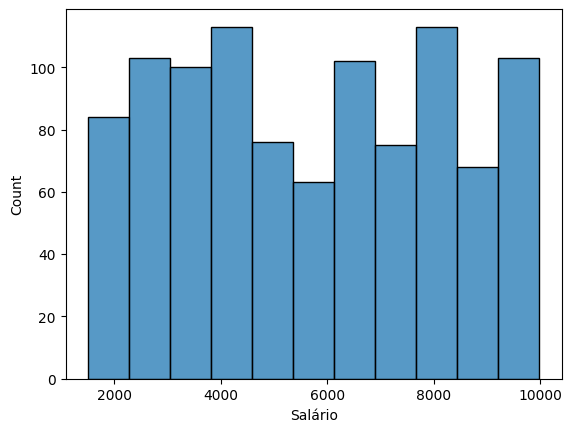

In [24]:
# Histograma dos Salários
sns.histplot(data=df, x="Salário")

<Axes: xlabel='Salário', ylabel='Idade'>

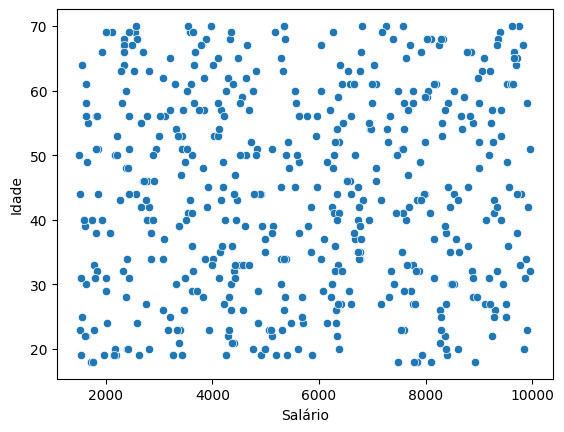

In [43]:
# Gráfico de dispersão entre Idades e Salários
sns.scatterplot(data=df, x="Salário", y="Idade")